<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<br>
<br>
<div align="right">
<b>Corso di Laurea Magistrale in Informatica</b><br>
<b>Curriculum Data Science</b><br>
</div>
</p>

<div align="right">
Matteo Marulli<br>
Matteo Ghera<br>
</div>

# Analisi dei dati del covid19 in Italia
Questa analisi dati è stata svolta prendendo i dati rilasciati dalla protezione civile sul covid19 in Italia.

In [55]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from path import Path
import json
from IPython.display import YouTubeVideo
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
PROJ_DIR = Path().getcwd().parent
DATA_DIR = PROJ_DIR / "data"
os.chdir (PROJ_DIR)

with open(DATA_DIR/'dpc-covid19-ita-province.json') as f:
         d= json.load(f)
json.dumps(d)
df_province =pd.DataFrame(d)

with open(DATA_DIR/'dpc-covid19-ita-regioni.json') as f:
         d= json.load(f)
json.dumps(d)
df_regioni =pd.DataFrame(d)

In [3]:
df_province.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
0,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,,
1,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,,
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,,
3,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,,
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,,0.000000,0.000000,0,,


In [4]:
df_regioni.head(20)

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5,NaN,,
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0,NaN,,
2,2020-02-24T18:00:00,ITA,21,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,0,1,NaN,,
3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1,NaN,,
4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10,NaN,,
5,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,0,18,0,0,18,148,NaN,,
6,2020-02-24T18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,0,58,NaN,,
7,2020-02-24T18:00:00,ITA,12,Lazio,41.892770,12.483667,1,1,2,0,2,0,2,1,0,3,124,NaN,,
8,2020-02-24T18:00:00,ITA,7,Liguria,44.411493,8.932699,0,0,0,0,0,0,0,0,0,0,1,NaN,,
9,2020-02-24T18:00:00,ITA,3,Lombardia,45.466794,9.190347,76,19,95,71,166,0,166,0,6,172,1463,NaN,,


## Descrizione dei dataset
Il dataset **Regioni** è composto da 16 variaibili e molte variabili sono di tipo int64 e float 64.
Le variabili prese in analisi sono:
- *data*: è il timestamp indica quando è stato inserito il record nel database, deve essere convertito nel formato date
- *stato*: indica lo stato in è stato rilevato il caso (tipo qualitativo e non ordinale)
- *codice_regione*: codice istat per identificare una regione (tipo quantitativo e non ordinale)
- *denominazione_regione*: indica il nome della regione, (tipo qualitativo e non ordinale)
- *lat*: latidudine della regione (tipo quantitativo e ordinale)
- *long*: longitudine della regione (tipo quantitativo e ordinale)
- *ricoverati_con_sintomi*: numero di persone che sono state ricoverate nel giorno indicato da data (tipo quantitativo e ordianale)
- *terapia_intesiva*: numero di persone che sono state ricoverate/spostate in terapia intensiva nel giorno indicato da data (tipo quantitativo e ordianale)
- *totale_ospedalizzati*: numero di persone che sono state ricoverate in ospedale (somma tra quelli in tp.intensiva e ricoverati con sintomi) nel giorno indicato da data (tipo quantitativo e ordianale)
- *isolamento_domiciliare*: numero di persone che sono insolamento_domiciliare nel giorno indicato da data (tipo quantitativo e ordianale)
- *totale_attualmente_positivi*: numero di persone in isolamento e ricoverati in ospedale nel giorno indicato da data (tipo quantitativo e ordianale)
- *nuovi_attualmente_positivi*: differenza di persone positive al Covid19 tra il giorno attuale e il giorno passato (tipo quantitativo e ordianale)
- *dimessi_guariti*: persone guarite dal covid19 nella giornata indicata da data (tipo quantitativo e ordianale)
- *deceduti*: persone morte a causa del covid19 nella giornata indicata da data (tipo quantitativo e ordianale)
- *totale_casi*: totale casi positivi nella giornata indicata da data (tipo quantitativo e ordianale)
- *tamponi*: numerod i campioni fatti dalla regione nella giornata indicata da data (tipo quantitativo e ordianale)

Una riga in questo dataset corrisponde ad una fotografia della situazione per le regione italiane in un determinato giorno.

Il dataset **Province** è composto da 12 variaibili.
Le variabili prese in analisi sono:
- *data*: è il timestamp indica quando è stato inserito il record nel database, deve essere convertito nel formato date (tipo qualitativo e non ordinale)
- *stato*: indica lo stato, verrà cancellata nel preprocessing (tipo qualitativo e non ordinale)
- *codice_regione*: codice istat per identificare una regione (tipo quantitativo e non ordinale)
- *denominazione_regione*: indica il nome della regione (tipo qualitativo e non ordinale)
- *lat*: latidudine della città (tipo quantitativo e ordinale)
- *long*: longitudine della città (tipo quantitativo e ordinale)
- *codice_provincia*: codice istat per identificare una provincia (tipo quantitativo e non ordinale)
- *denominanzione_provincia*: indica il nome della provincia (tipo qualitativo e non ordinale)
- *sigla_provincia*: sigla della provincia usate per le targe auto (tipo qualitativo e non ordinale)
- *totale_casi*: persone infette da covid19 (tipo quantitativo e ordianale)
- *note_it*: note informative in italiano (tipo qualitativo e non ordinale)
- *note_en*: note informative in inglese (tipo qualitativo e non ordinale)
- *casi_testati*: numero di persone sottoposte al test per covid-19


Le colonne in comune nei due dataset sono:
- *data*
- *stato*
- *note_en*
- *note_it*
- *codice_regione*
- *totale_casi*
- *denominazione_regione*
- *lat*
- *long*

Una riga in questo dataset corrisponde ad una fotografia della situazione per le province italiane in un determinato giorno.

Le colonne candidate per eseguire la *join* sono: *data* e *denominazione_regione*

In [5]:
set(df_regioni.columns).intersection(set(df_province.columns))

{'codice_regione',
 'data',
 'denominazione_regione',
 'lat',
 'long',
 'note_en',
 'note_it',
 'stato',
 'totale_casi'}

## Data preparation

In [6]:
joinDF = pd.merge(df_province, df_regioni, on= ['data', 'codice_regione'])
joinDF

,data,stato_x,codice_regione,denominazione_regione_x,codice_provincia,denominazione_provincia,sigla_provincia,lat_x,long_x,totale_casi_x,...,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi_y,tamponi,casi_testati,note_it_y,note_en_y
0,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,...,0,0,0,0,0,0,5,NaN,,
1,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,...,0,0,0,0,0,0,5,NaN,,
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,...,0,0,0,0,0,0,5,NaN,,
3,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,...,0,0,0,0,0,0,5,NaN,,
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,,0.000000,0.000000,0,...,0,0,0,0,0,0,5,NaN,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10491,2020-05-18T17:00:00,ITA,5,Veneto,26,Treviso,TV,45.667546,12.245074,2641,...,4004,-37,9,13143,1803,18950,513021,275851.0,,
10492,2020-05-18T17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,2633,...,4004,-37,9,13143,1803,18950,513021,275851.0,,
10493,2020-05-18T17:00:00,ITA,5,Veneto,23,Verona,VR,45.438390,10.993527,5008,...,4004,-37,9,13143,1803,18950,513021,275851.0,,
10494,2020-05-18T17:00:00,ITA,5,Veneto,24,Vicenza,VI,45.547497,11.545971,2818,...,4004,-37,9,13143,1803,18950,513021,275851.0,,


## Data cleaning

In questa sezioni si elimineranno le colonne che riteniamo non necessarie perchè forniscono informazioni ridondanti: *stato, codice_regione, note_en, note_it, codice_regione, codice_provincia* e *sigla_provincia*. Dopo che abbiamo eseguito la *join* sono nate delle colonne, indicate da \_x e da \_y, che abbiamo rimosso rimuovendo il suffisso finale. 

Successivamente abbiamo rinomato le colonne che avevano lo stesso nome ma valori diversi e abbiamo rimpiazzato i valori `NaN` della colonna *casi_testati* con la media dei valori nella colonna.

In [7]:
joinDF.rename({"totale_casi_x":"totale_casi_provincia", "totale_casi_y":"totale_casi_regioni", "lat_x": "lat_provincia", "lat_y":"lat_regione","long_x":"long_provincia","long_y":"long_regione"}, axis=1, inplace=True)

In [8]:
joinDF.columns = joinDF.columns.str.replace('_x','')
joinDF.drop(columns=["denominazione_regione_y"], inplace=True)
joinDF.columns = joinDF.columns.str.replace('_y','')
joinDF['data'] = pd.to_datetime(joinDF['data'], format='%Y-%m-%d') 
joinDF.drop(columns=['stato', 'codice_regione', 'note_en', 'note_it', 'codice_regione', 'codice_provincia','sigla_provincia'], axis=1, inplace = True)
joinDF['casi_testati'].fillna(joinDF['casi_testati'].mean(), inplace = True)
joinDF

,data,denominazione_regione,denominazione_provincia,lat_provincia,long_provincia,totale_casi_provincia,lat_regione,long_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi_regioni,tamponi,casi_testati
0,2020-02-24 18:00:00,Abruzzo,Chieti,42.351032,14.167546,0,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5,96180.685938
1,2020-02-24 18:00:00,Abruzzo,L'Aquila,42.351222,13.398438,0,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5,96180.685938
2,2020-02-24 18:00:00,Abruzzo,Pescara,42.464584,14.213648,0,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5,96180.685938
3,2020-02-24 18:00:00,Abruzzo,Teramo,42.658918,13.704400,0,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5,96180.685938
4,2020-02-24 18:00:00,Abruzzo,In fase di definizione/aggiornamento,0.000000,0.000000,0,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5,96180.685938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10491,2020-05-18 17:00:00,Veneto,Treviso,45.667546,12.245074,2641,45.434905,12.338452,263,22,285,3719,4004,-37,9,13143,1803,18950,513021,275851.000000
10492,2020-05-18 17:00:00,Veneto,Venezia,45.434905,12.338452,2633,45.434905,12.338452,263,22,285,3719,4004,-37,9,13143,1803,18950,513021,275851.000000
10493,2020-05-18 17:00:00,Veneto,Verona,45.438390,10.993527,5008,45.434905,12.338452,263,22,285,3719,4004,-37,9,13143,1803,18950,513021,275851.000000
10494,2020-05-18 17:00:00,Veneto,Vicenza,45.547497,11.545971,2818,45.434905,12.338452,263,22,285,3719,4004,-37,9,13143,1803,18950,513021,275851.000000


## Data exploration

In questa fase cercheremo di rispondere a queste domande:

- Quali sono state le regioni con più ricoverati?*
- Quali sono state le regioni che hanno avuto più vittime? E quali sono quello con meno vittime?*
- Quali sono state le regioni con più malati?*
- Quanti tamponi sono stati fatti e chi ne ha fatti di più? *
- E’ stata superata la capienza nazionale dei posti letto?
- E’ stata superata la capienza regionale dei posti letto?
- Quanto è costata alla regione curare un malato covid in terapia intensiva?*
- Quanto è costato allo stato curare un malato covid in terapia intensiva?*
- Quanto soldi ha speso ogni regione per fare i tamponi per il covid?*
- Quanto soldi ha speso lo stato per fare i tamponi per il covid?*
- Come si è diffuso nel tempo il Covid-19 in Italia?*
- Quanti sono i casi positivi?
- Quanti sono i morti?
- Quali sono state le regioni che hanno gestito meglio l’emergenza sanitaria?
- Quali sono state le regioni che hanno gestito meglio l’emergenza sanitaria?

Le domande precedenti possono essere eseguite anche per le province.

Risorse: <br>
https://it.businessinsider.com/terapia-intensive-coronavirus-quanto-costa-allo-stato-italiano-un-paziente-grave/ <br>
https://www.telemessina.it/2020/03/24/come-si-effettua-e-quanto-costa-un-tampone-per-covid-19/


In [9]:
plt.style.use('seaborn-pastel')

In [10]:
joinDF.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10496 entries, 0 to 10495
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   data                        10496 non-null  datetime64[ns]
 1   denominazione_regione       10496 non-null  object        
 2   denominazione_provincia     10496 non-null  object        
 3   lat_provincia               10496 non-null  float64       
 4   long_provincia              10496 non-null  float64       
 5   totale_casi_provincia       10496 non-null  int64         
 6   lat_regione                 10496 non-null  float64       
 7   long_regione                10496 non-null  float64       
 8   ricoverati_con_sintomi      10496 non-null  int64         
 9   terapia_intensiva           10496 non-null  int64         
 10  totale_ospedalizzati        10496 non-null  int64         
 11  isolamento_domiciliare      10496 non-null  int64     

In [11]:
joinDF.describe()

,lat_provincia,long_provincia,totale_casi_provincia,lat_regione,long_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi_regioni,tamponi,casi_testati
count,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000
mean,35.868843,10.112000,958.071456,42.945741,12.036218,1351.166921,156.793921,1507.960842,3525.129192,5033.090034,61.449409,207.873666,3019.164158,1309.605850,9361.860042,71229.496475,96180.685938
std,16.072290,5.097835,2048.274448,2.514866,2.610528,2488.958976,260.958626,2742.322356,5716.724056,8033.131626,343.468372,375.870174,6636.474909,3062.891965,17103.445468,105351.765570,47425.772108
min,0.000000,0.000000,0.000000,38.115697,7.320149,0.000000,0.000000,0.000000,0.000000,0.000000,-5339.000000,-18.000000,0.000000,0.000000,0.000000,0.000000,3482.000000
25%,38.848542,8.583304,20.000000,41.125596,9.190347,91.000000,13.000000,106.000000,216.000000,396.000000,-11.000000,14.000000,19.000000,22.000000,544.000000,4895.750000,96180.685938
50%,42.609815,11.188560,253.000000,43.769231,12.338452,397.000000,58.000000,443.000000,1343.000000,1942.000000,16.000000,61.000000,381.000000,220.000000,2859.000000,29241.000000,96180.685938
75%,44.947714,13.593962,966.000000,45.163682,13.518875,1169.000000,184.000000,1389.000000,3906.000000,5427.000000,103.000000,196.000000,2116.000000,874.000000,8723.000000,88384.000000,96180.685938
max,46.499335,18.171897,22222.000000,46.499335,16.867367,12077.000000,1381.000000,13328.000000,30382.000000,37307.000000,1950.000000,3251.000000,42403.000000,15543.000000,85019.000000,581437.000000,343213.000000


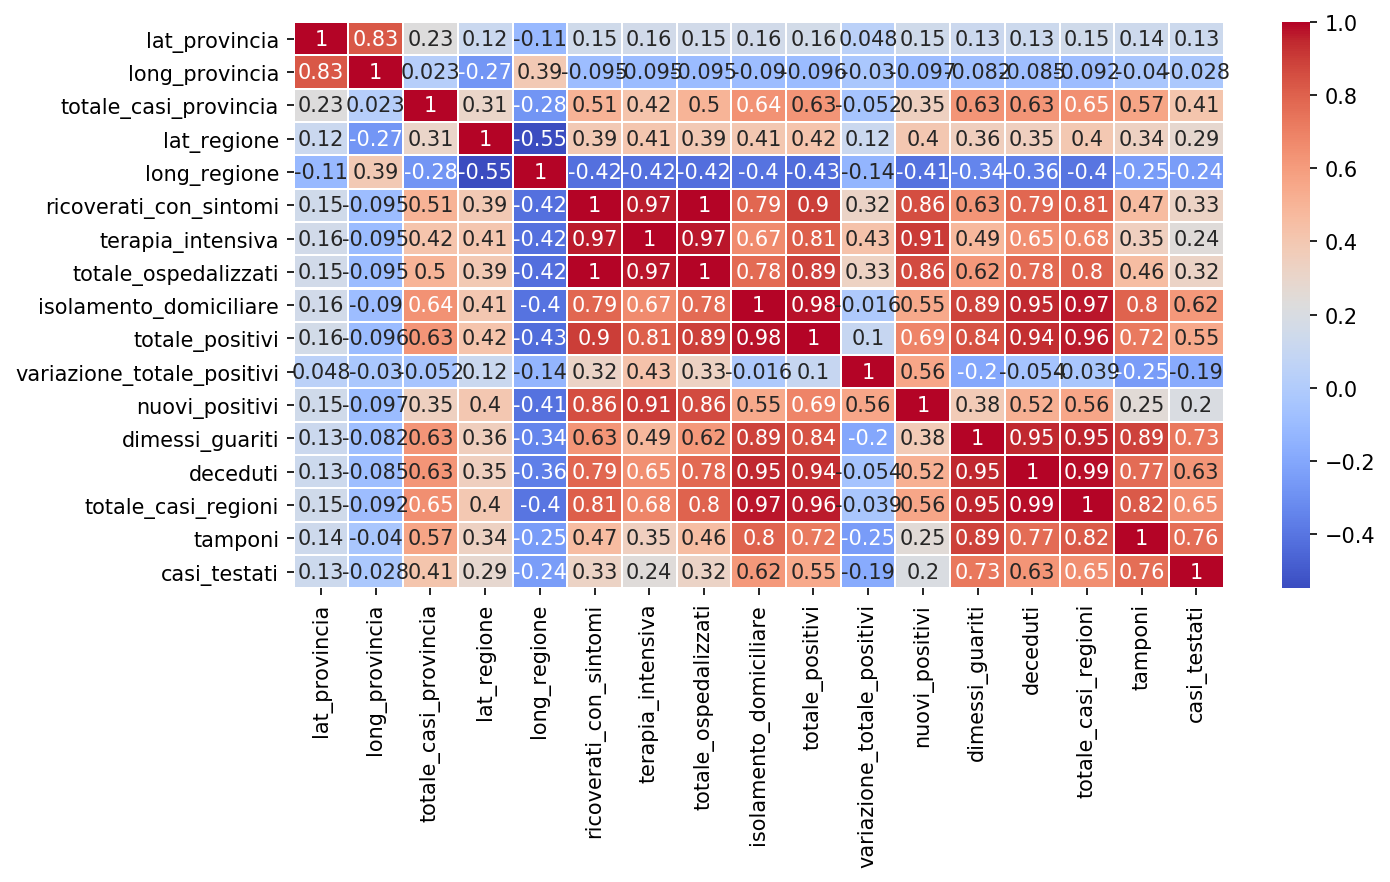

In [12]:
plt.figure(figsize=(10,5), dpi = 150)
sns.heatmap(joinDF.corr(), annot=True, linewidths= 0.5 , cmap = 'coolwarm')

> *Quali sono state le regioni con più malati?*

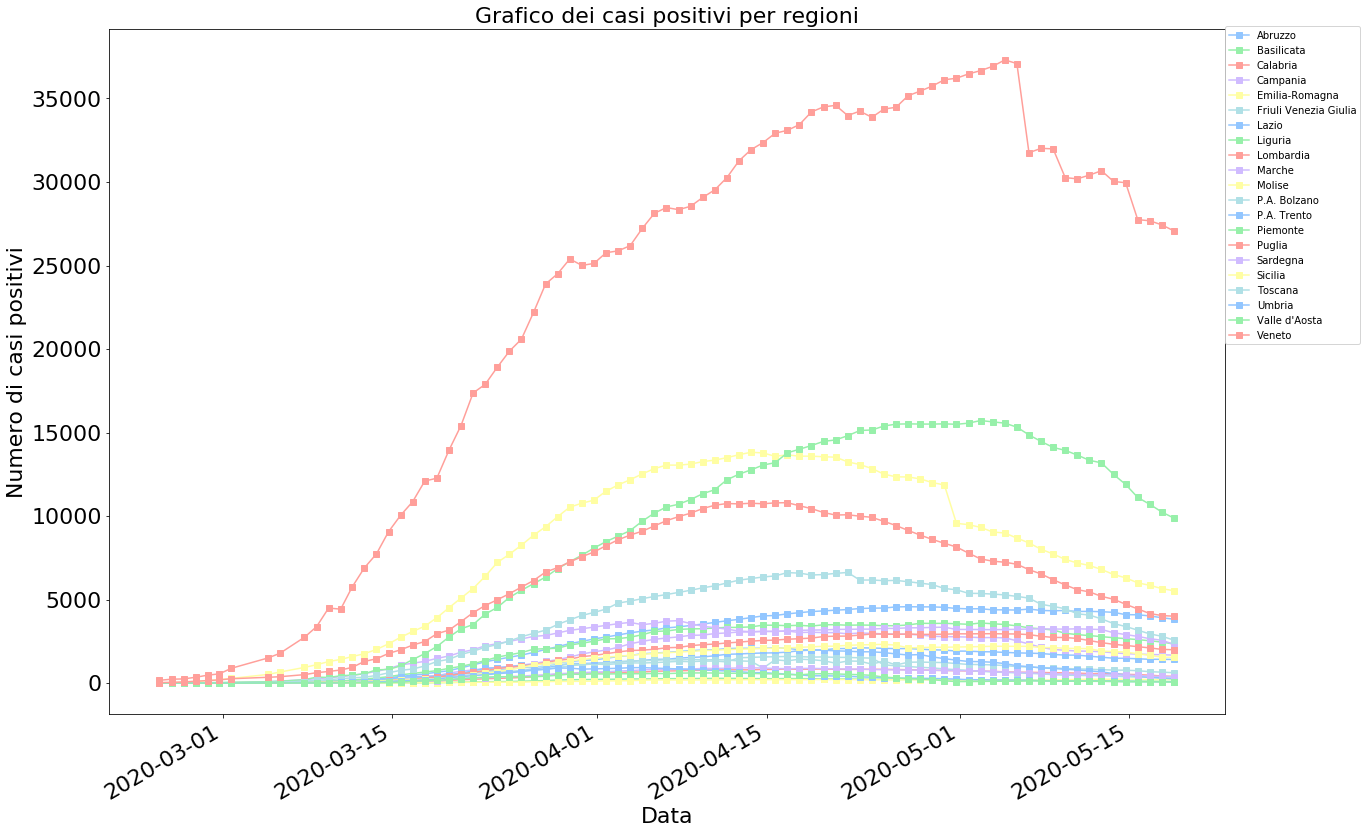

In [13]:
casiPositviPerRegioni = joinDF.pivot_table('totale_positivi', index=['data'], columns=['denominazione_regione'], aggfunc='max' )
casiPositviPerRegioni.plot(figsize=(20,14), marker='s', fontsize=22)
plt.title('Grafico dei casi positivi per regioni', size = 22)
plt.xlabel('Data',size = 22)
plt.ylabel('Numero di casi positivi', size = 22 )
plt.legend(loc=(1,0.54))

> *Quanti tamponi sono stati fatti e chi ne ha fatti di più?*

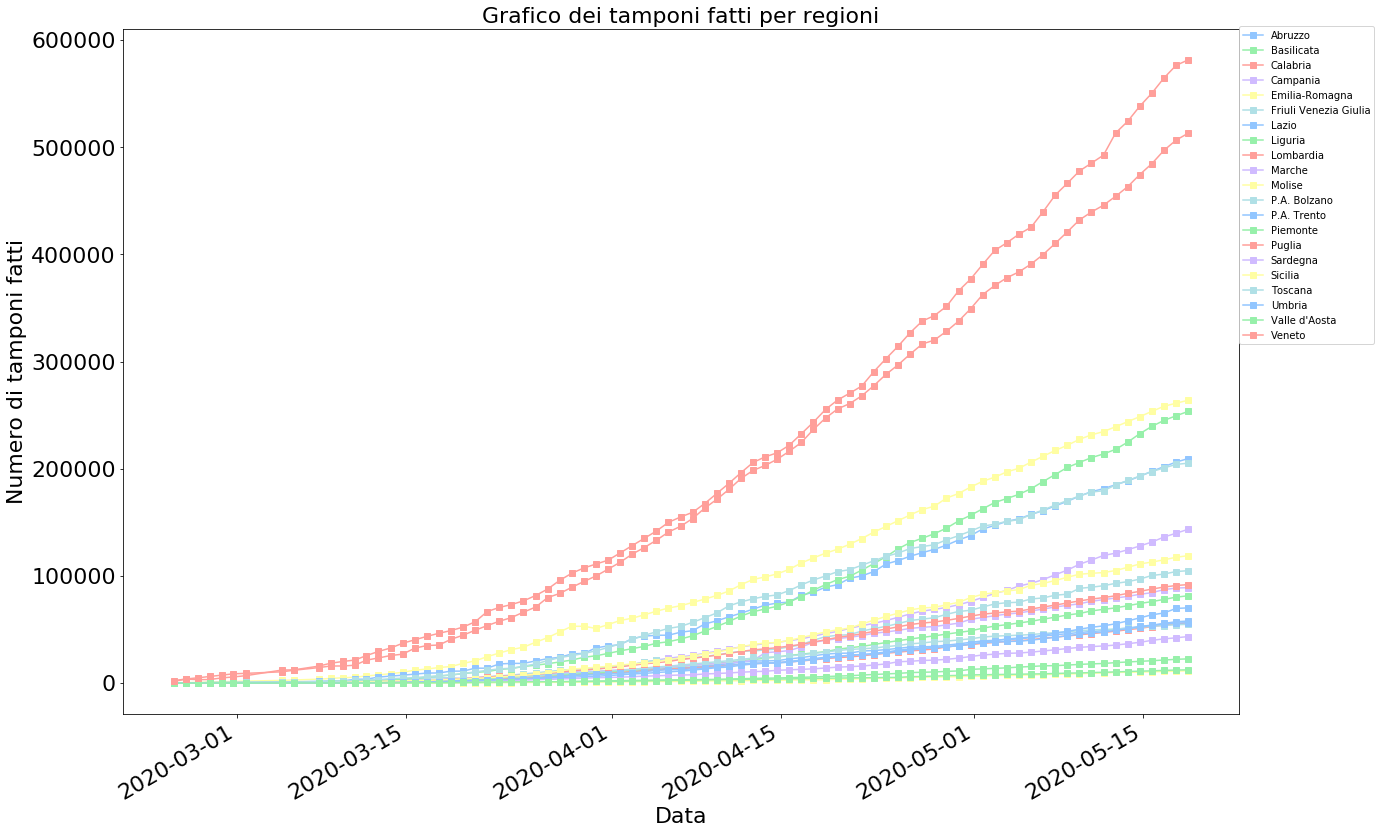

In [14]:
tamponiPerRegioni = joinDF.pivot_table('tamponi', index=['data'], columns=['denominazione_regione'], aggfunc='max' )
tamponiPerRegioni.plot(figsize=(20,14), marker='s', fontsize=22)
plt.title('Grafico dei tamponi fatti per regioni', size = 22)
plt.xlabel('Data',size = 22)
plt.ylabel('Numero di tamponi fatti', size = 22 )
plt.legend(loc=(1,0.54))

>*Quanto soldi ha speso ogni regione per fare i tamponi per il covid?*

(array([       0.,  2500000.,  5000000.,  7500000., 10000000., 12500000.,
        15000000., 17500000., 20000000.]),
 <a list of 9 Text yticklabel objects>)

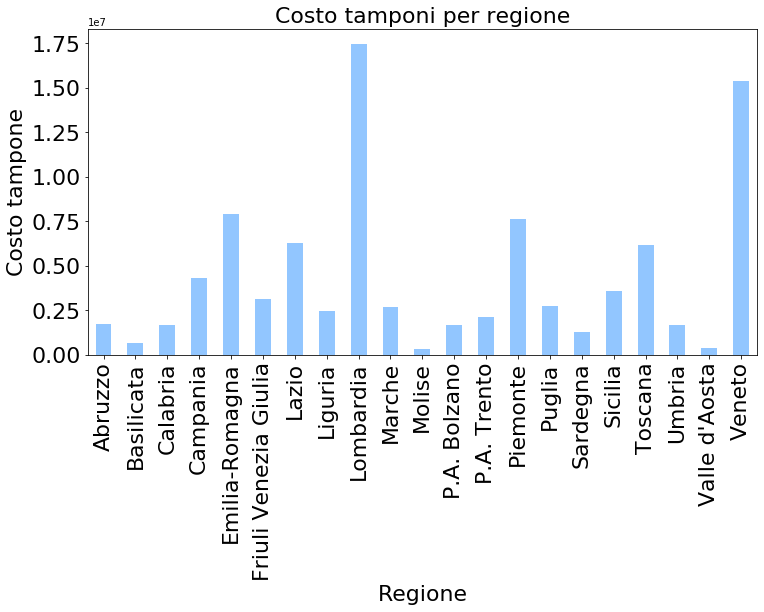

In [15]:
numero_tamponi_regione=np.max(tamponiPerRegioni)
costo_tamponi_regione=numero_tamponi_regione*30
costo_tamponi_regione.plot(kind="bar", figsize=(12,6))
plt.title("Costo tamponi per regione", size=22)
plt.ylabel("Costo tampone", size=22)
plt.xlabel("Regione", size=22)
plt.xticks(size=22)
plt.yticks(size=22)

>*Quanto soldi ha speso lo stato per fare i tamponi per il covid?*

In [16]:
np.sum(costo_tamponi_regione)
91.240.980

91240980

> *Quali sono state le regioni che hanno avuto più vittime? E quali sono quello con meno vittime?*

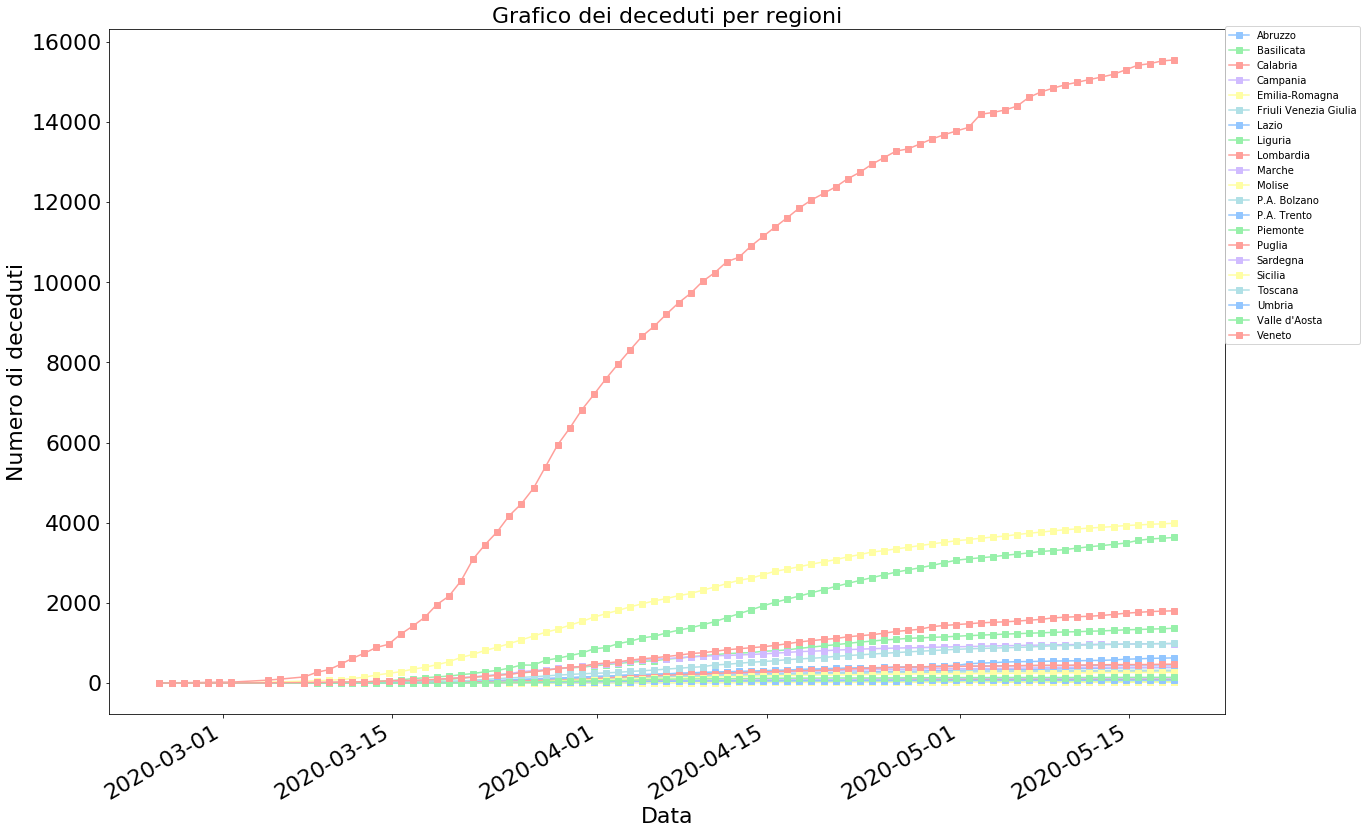

In [17]:
decedutiPerRegioni = joinDF.pivot_table('deceduti', index=['data'], columns=['denominazione_regione'], aggfunc='max' )
decedutiPerRegioni.plot(figsize=(20,14), marker='s', fontsize=22)
plt.title('Grafico dei deceduti per regioni', size = 22)
plt.xlabel('Data',size = 22)
plt.ylabel('Numero di deceduti', size = 22 )
plt.legend(loc=(1,0.54))

In [ ]:
fig = px.treemap(full_latest.sort_values(by='Deaths', ascending=False).reset_index(drop=True), 
                 path=["Region"], values="Deaths", height=700,
                 title='Number of Deaths reported',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.data[0].textinfo = 'label+text+value'
fig.show()


In [88]:
np.max(decedutiPerRegioni.index)
lastDayDead =decedutiPerRegioni.loc[np.max(decedutiPerRegioni.index)]
lastDayDead = lastDayDead.to_frame('morti')
figLastDead = px.treemap(lastDayDead.sort_values(by = 'morti', ascending = False).reset_index(),
                        path = ["denominazione_regione"], values= 'morti',
                        color_discrete_sequence = px.colors.qualitative.Prism,
                        title="Chart deceduti per regione")
figLastDead.show()

>*Quali sono state le regioni con più ricoverati?*

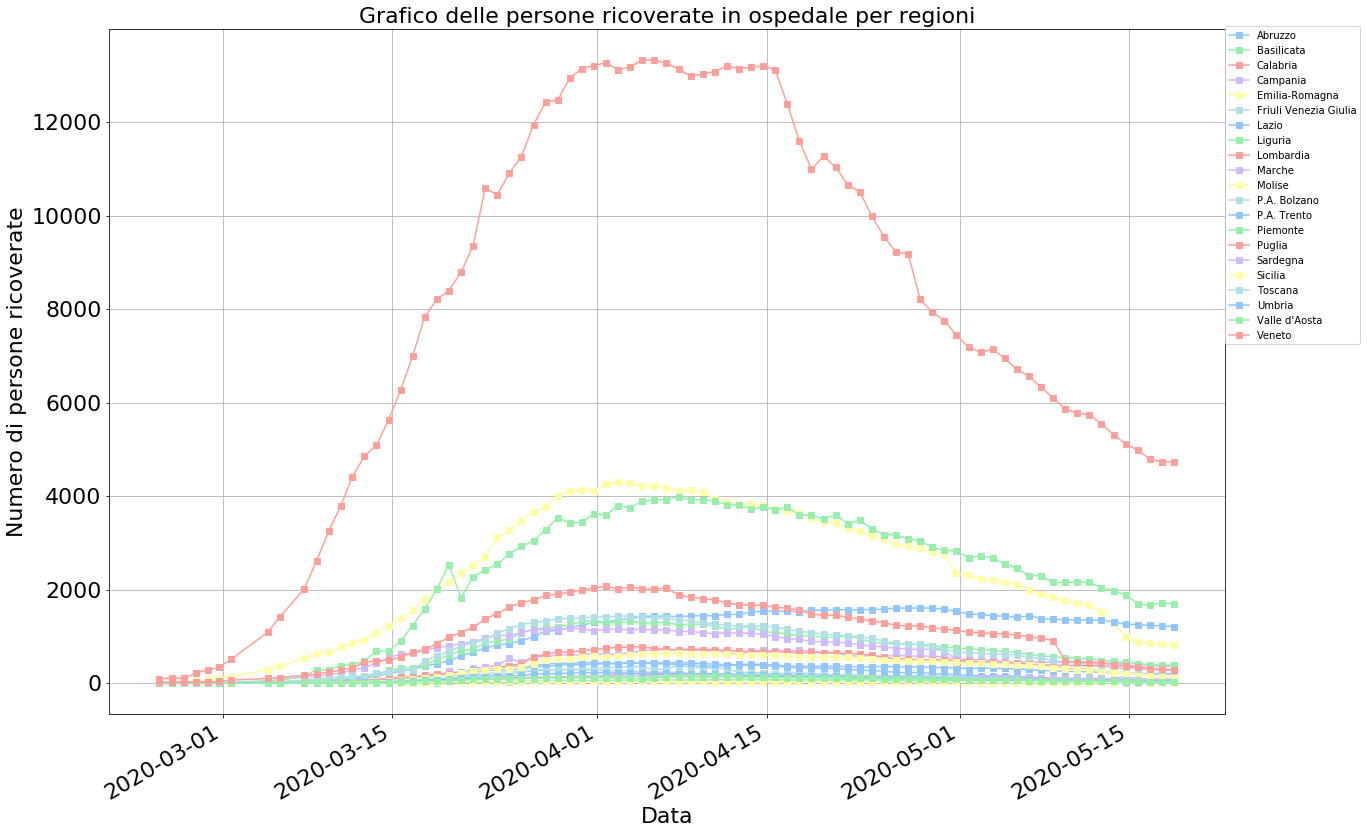

In [18]:
ospedalizzatiPerRegioni = joinDF.pivot_table(values = 'totale_ospedalizzati', index=['data'], columns=['denominazione_regione'], aggfunc='max' )
ospedalizzatiPerRegioni.plot(figsize=(20,14), marker='s', fontsize=22)
plt.title('Grafico delle persone ricoverate in ospedale per regioni', size = 22)
plt.xlabel('Data',size = 22)
plt.ylabel('Numero di persone ricoverate', size = 22 )
plt.legend(loc=(1,0.54))
plt.grid()

No handles with labels found to put in legend.


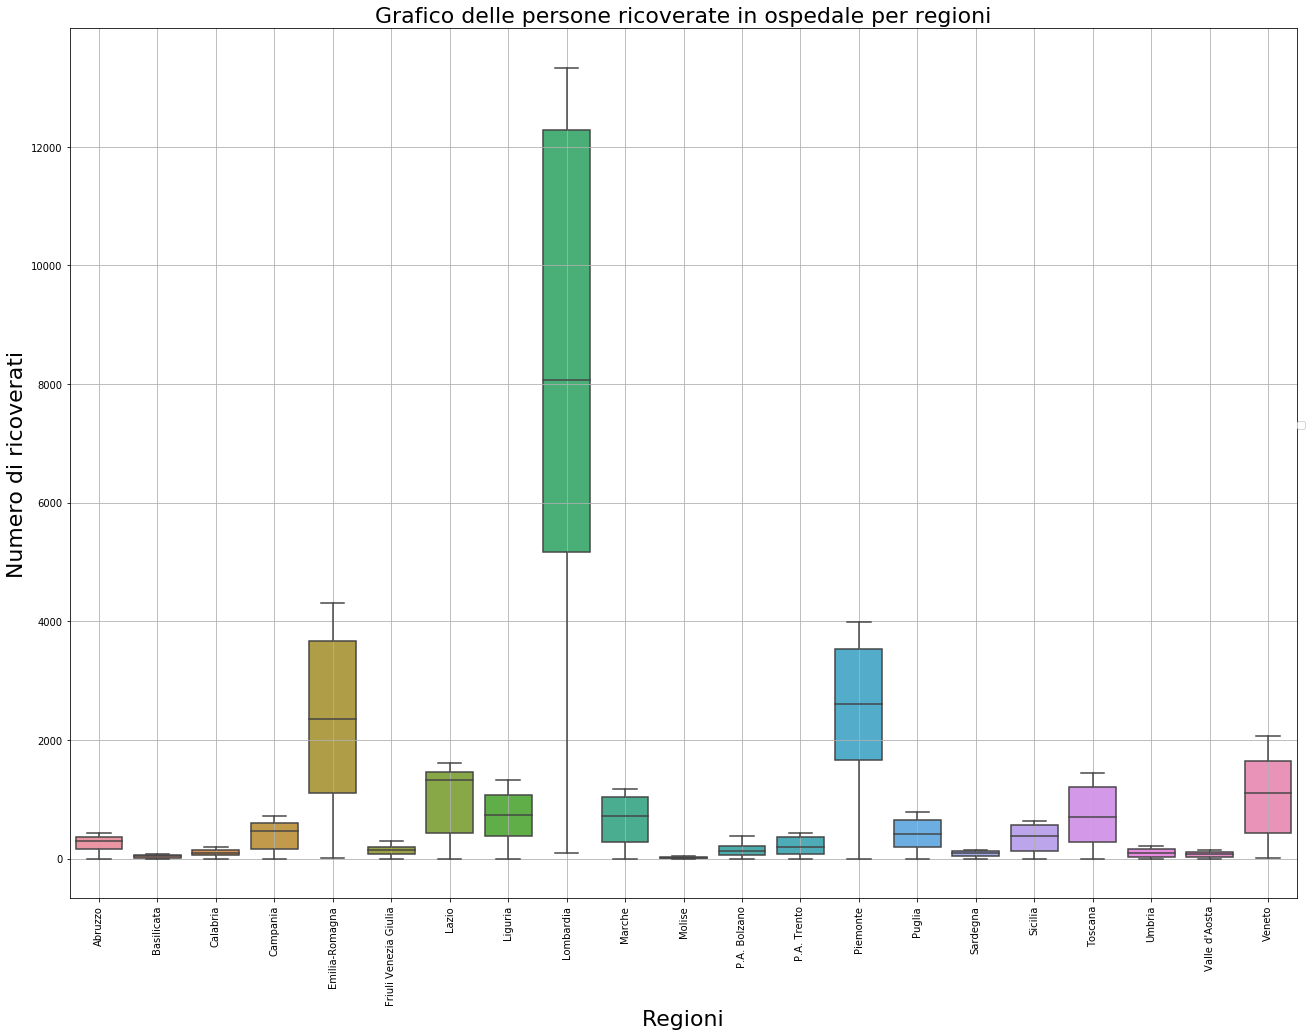

In [19]:
#ospedalizzatiPerRegioni.boxplot(figsize=(20,14), fontsize=22)
plt.figure(figsize = (22,16))
sns.boxplot(data= ospedalizzatiPerRegioni)
plt.title('Grafico delle persone ricoverate in ospedale per regioni', size = 22)
plt.xlabel('Regioni',size = 22)
plt.xticks(rotation=90)
plt.ylabel('Numero di ricoverati', size = 22 )
plt.legend(loc=(1,0.54))
plt.grid()

>*Quanto è costata alla regione curare un malato covid in terapia intensiva?*

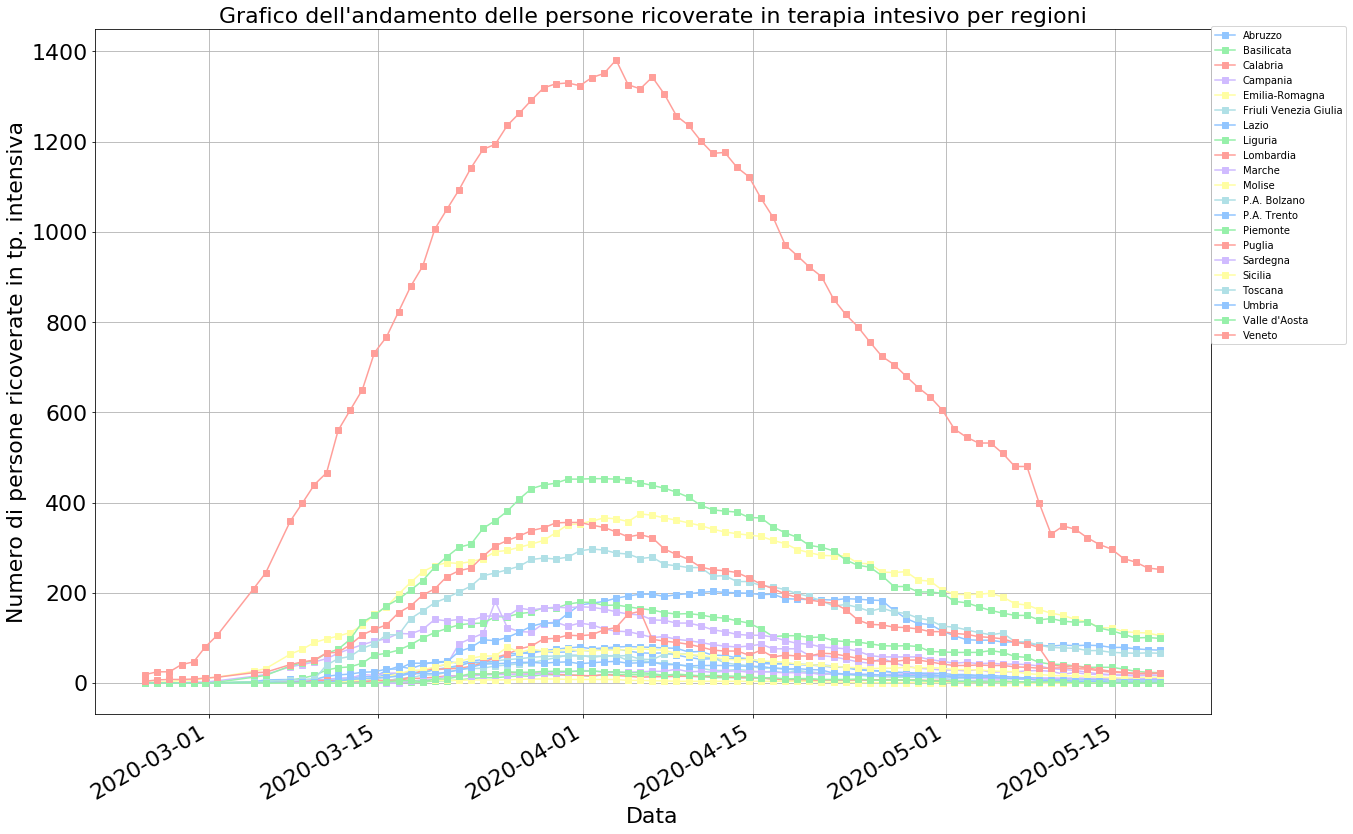

In [20]:
terapiaIntsPerRegioni = joinDF.pivot_table(values = 'terapia_intensiva', index=['data'], columns=['denominazione_regione'], aggfunc='max' )
terapiaIntsPerRegioni.plot(figsize=(20,14), marker='s', fontsize=22)
plt.title("Grafico dell'andamento delle persone ricoverate in terapia intesivo per regioni", size = 22)
plt.xlabel('Data',size = 22)
plt.ylabel('Numero di persone ricoverate in tp. intensiva', size = 22 )
plt.legend(loc=(1,0.54))
plt.grid()

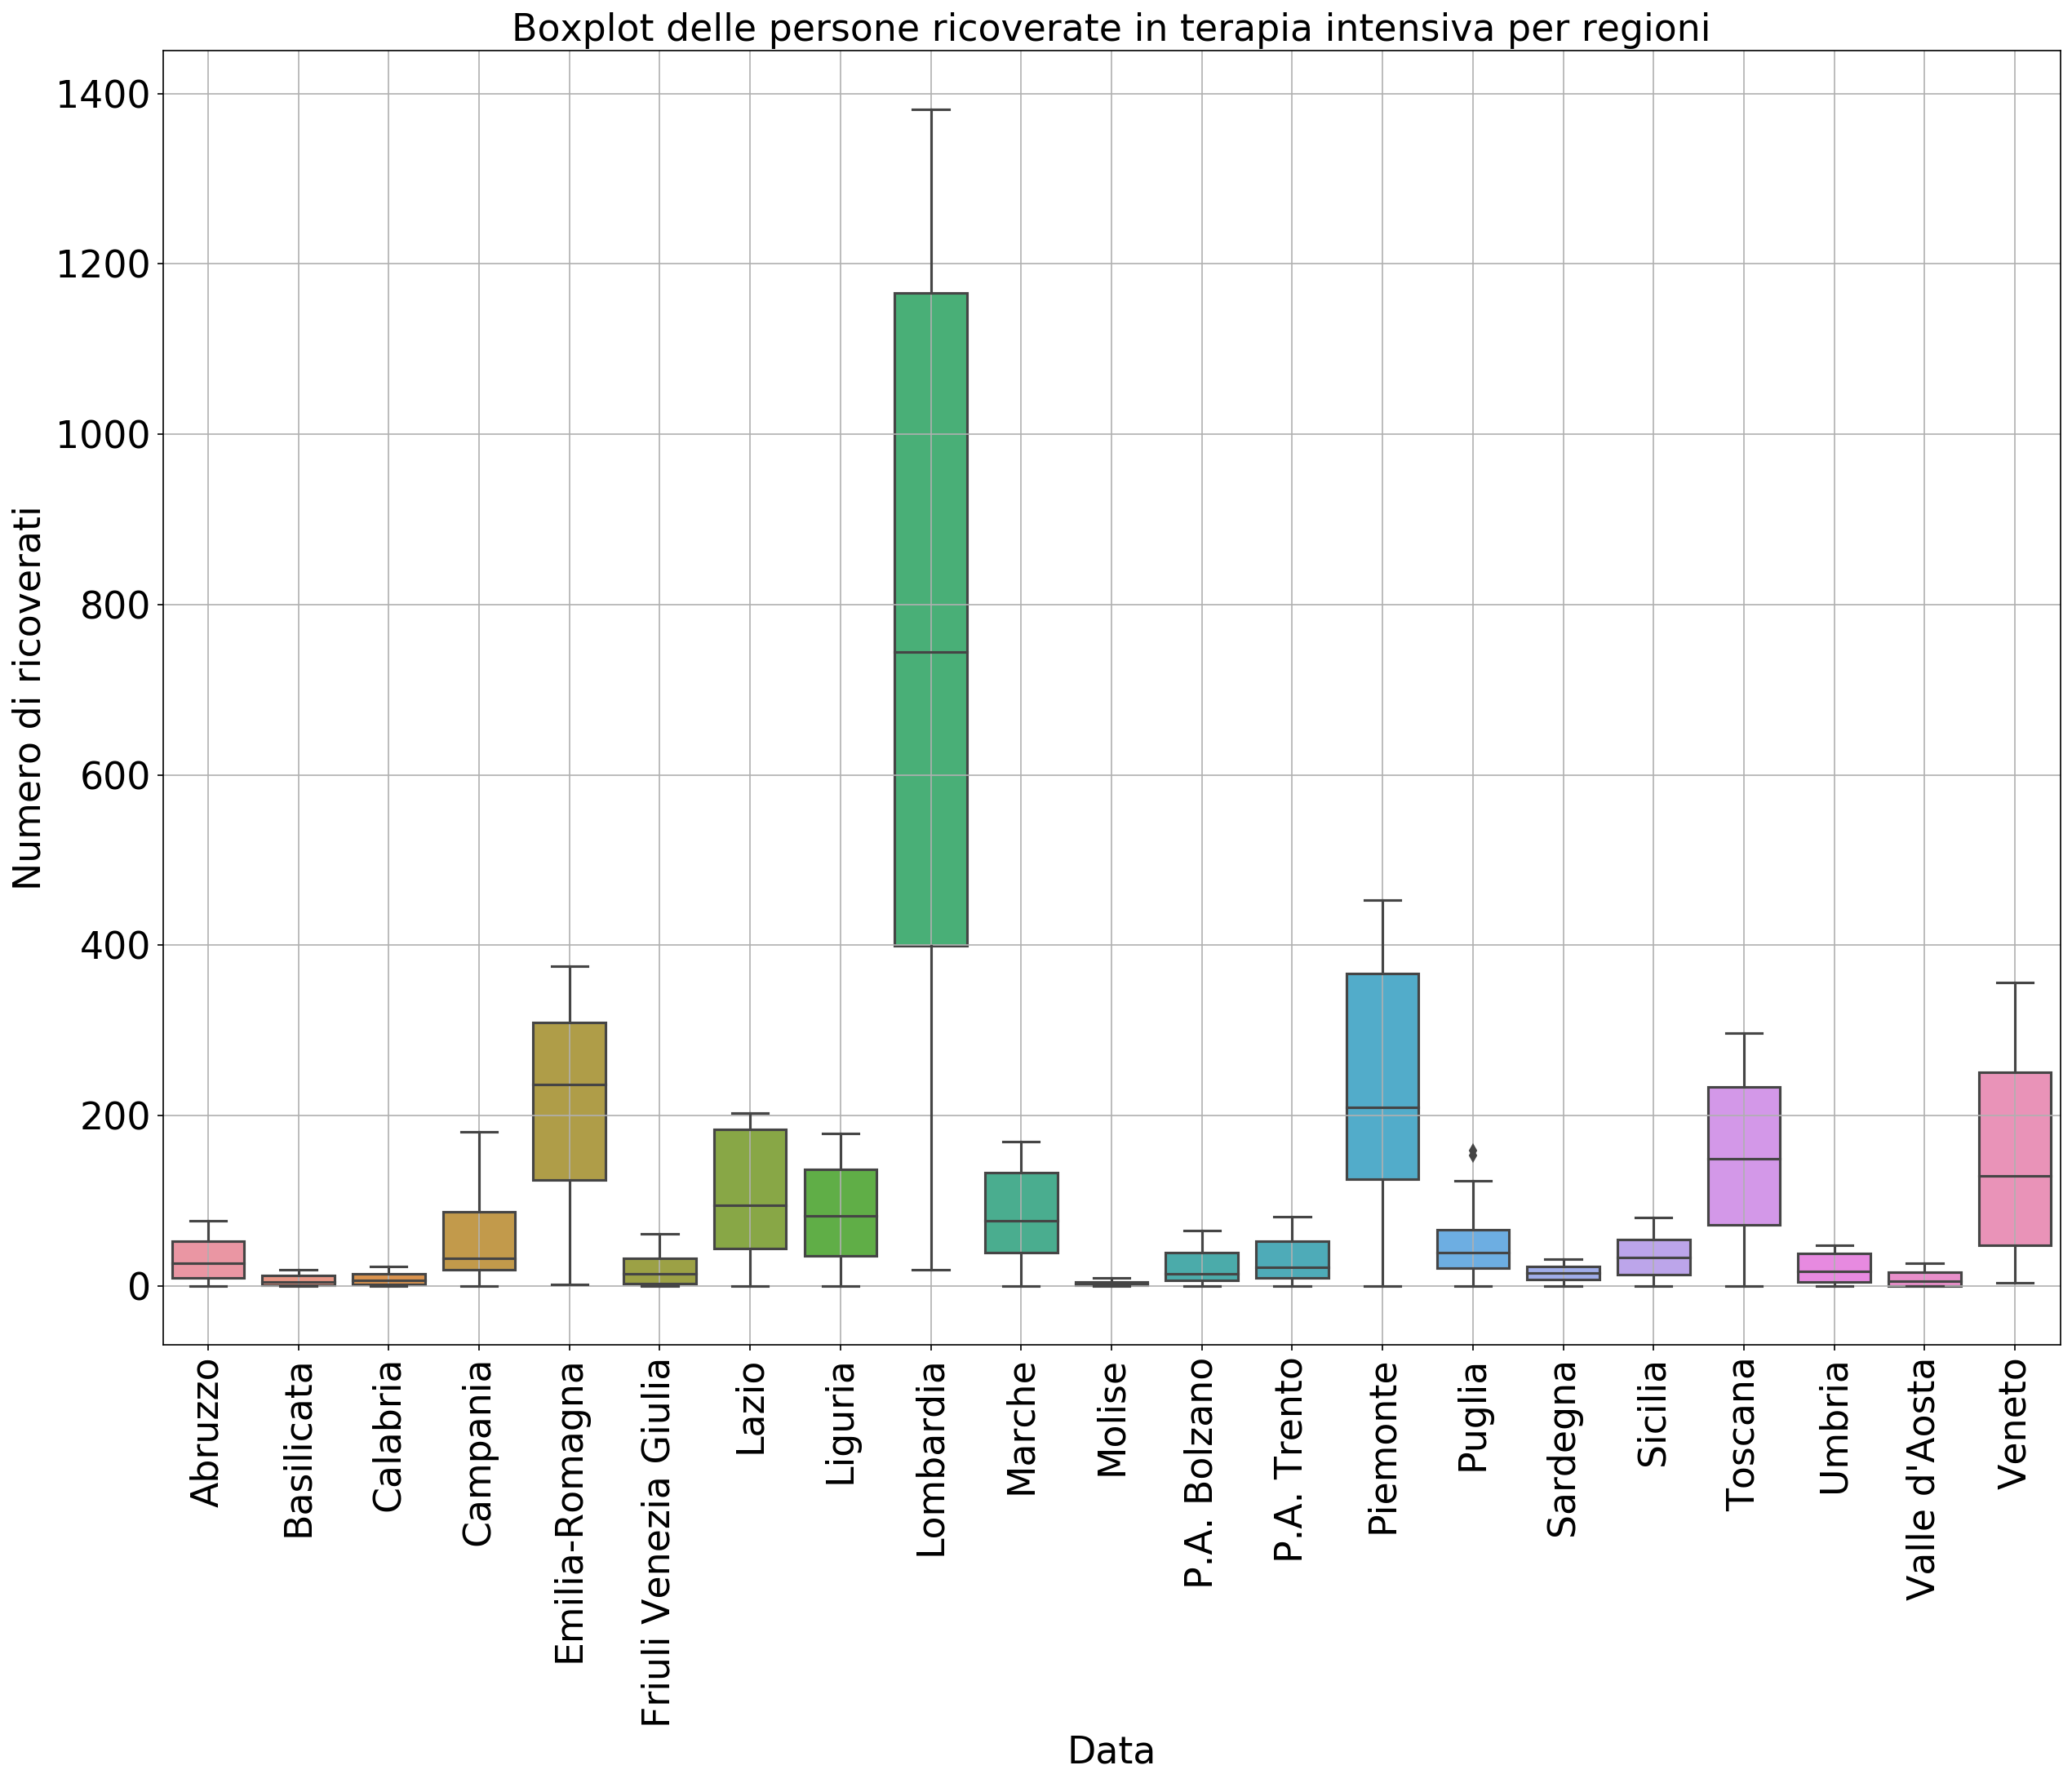

In [94]:
plt.figure(figsize=(20,14), dpi = 150)
plt.title('Boxplot delle persone ricoverate in terapia intensiva per regioni', size = 22)
sns.boxplot(data = terapiaIntsPerRegioni)
plt.xlabel('Data',size = 22)
plt.xticks(rotation=90, size = 22)
plt.yticks(size = 22)
plt.ylabel('Numero di ricoverati', size = 22 )
plt.grid()
#plt.legend(loc=(1,0.54))

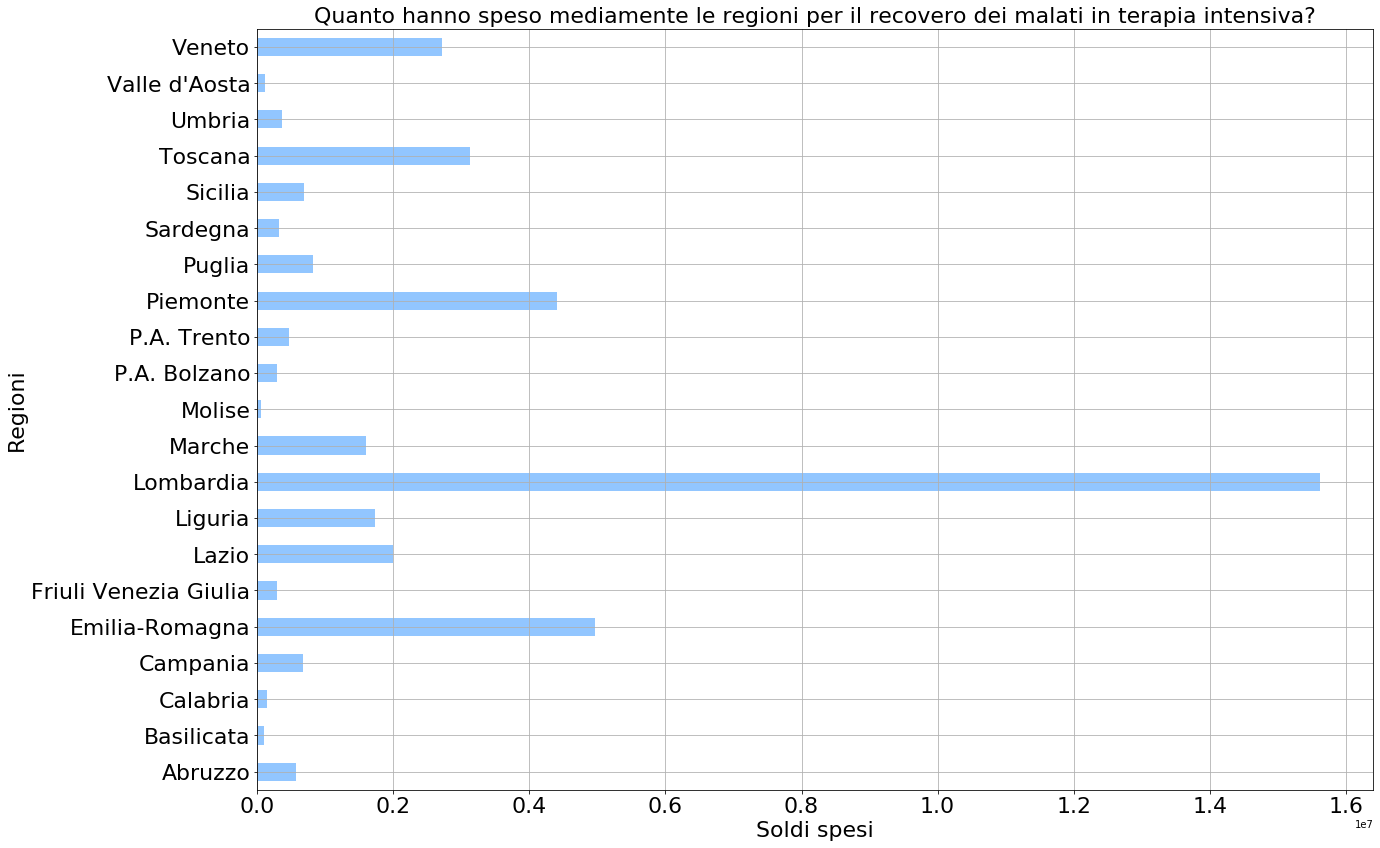

In [95]:
costi_medi_terapia_intensiva=terapiaIntsPerRegioni.median()*1500*14
costi_medi_terapia_intensiva.plot(kind='barh', figsize=(20,14))
plt.title('Quanto hanno speso mediamente le regioni per il recovero dei malati in terapia intensiva?', size = 22)
plt.xlabel('Soldi spesi',size = 22)
plt.xticks(size=22)
plt.yticks(size=22)
plt.ylabel('Regioni', size = 22 )
plt.grid()

>*Quanto è costato mediamente allo stato curare un malato covid in terapia intensiva?*

In [23]:
np.sum(costi_medi_terapia_intensiva)

41044500.0

>*Come si è diffuso nel tempo il Covid-19 in Italia?*

In [48]:
casiPositviPerRegioni =joinDF.pivot_table(index=['data','denominazione_regione'],
                                          aggfunc={'lat_regione':np.max,'long_regione':np.max, 'totale_positivi':np.max, 'deceduti':np.max})
casiPositviPerRegioniCopy = casiPositviPerRegioni.copy()
casiPositviPerRegioniCopy['dim'] = casiPositviPerRegioniCopy['totale_positivi'].pow(0.5)
casiPositviPerRegioniCopy.reset_index(inplace = True)
casiPositviPerRegioniCopy['data']=casiPositviPerRegioniCopy['data'].dt.strftime('%m/%d/%Y')
fig = px.scatter_mapbox(casiPositviPerRegioniCopy, lat="lat_regione", lon="long_regione",
                        color="totale_positivi",size='dim',
                        hover_name='denominazione_regione', hover_data=['totale_positivi'],
                        range_color= [0, max(casiPositviPerRegioniCopy['totale_positivi'])+2],
                        animation_frame="data", 
                        title='Diffusione del covid nel tempo')
fig.update(layout_coloraxis_showscale=True)
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=4, mapbox_center = {"lat": 41.8719, "lon": 12.5674})
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

## Data prediction con il modello SIR
<img src="https://lacittanews.it/wp-content/uploads/2020/04/702635-thumb-full-720-160420merkel.jpg" 
        alt="UniFI logo" style="float: center; width: 40%; height: 36%;">
        



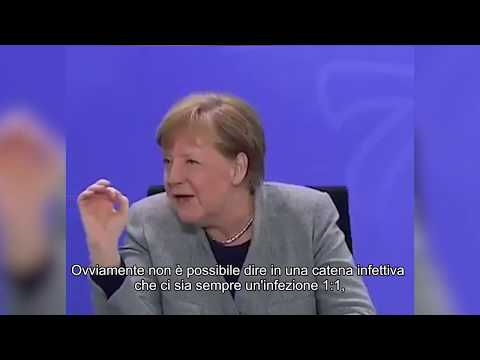

In [25]:
YouTubeVideo('aBO9gvgiuVA')

In [26]:
def SIR(y, t, n, beta, gamma):
    S, I, R = y
    dSdt = -(beta*S*I)/n
    dRdt = gamma*I
    dIdt = -dSdt -dRdt
    return dSdt, dIdt, dRdt

In [53]:
from scipy.integrate import odeint

# Total population, N.
N = 10e6 #numero di abitanti in lombardia
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 176, 0 #si comincia con un infetto e zero guariti/morti
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0 # ci ricaviamo il numero di persone sane
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.35, 1./10
# A grid of time points (in days)
t = np.linspace(0, 120, 121) #tempo in numero di giorni

y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(SIR, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

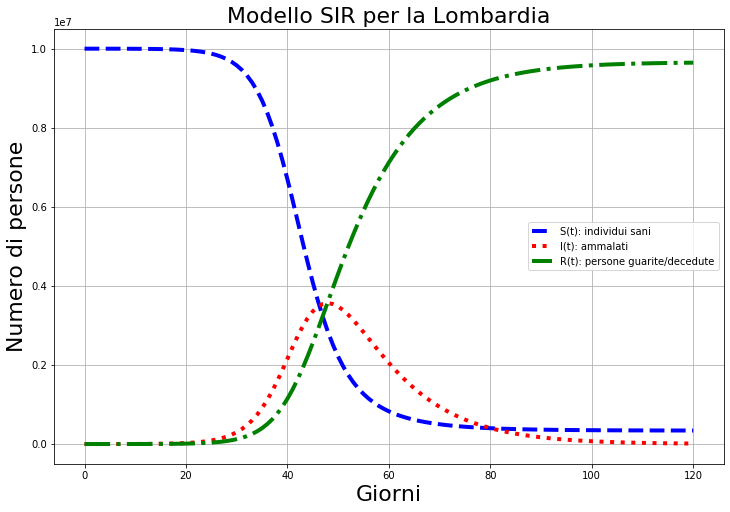

In [54]:
plt.figure(figsize=(12,8))
plt.plot(S, lw = 4, color = 'blue', linestyle ='--', label='S(t): individui sani')
plt.plot(I, lw = 4, color = 'red',linestyle =':', label='I(t): ammalati')
plt.plot(R, lw = 4, color = 'green',linestyle = '-.', label='R(t): persone guarite/decedute')
plt.title('Modello SIR per la Lombardia', size = 22)
plt.xlabel('Giorni', size = 22)
plt.ylabel('Numero di persone', size = 22)
plt.legend()
plt.grid()

In [29]:
# Total population, N.
N = 3700000 #numero di abitanti in lombardia
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0 #si comincia con un infetto e zero guariti/morti
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0 # ci ricaviamo il numero di persone sane
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.35, 1./10
# A grid of time points (in days)
t = np.linspace(0, 90, 91) #tempo in numero di giorni

y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(SIR, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

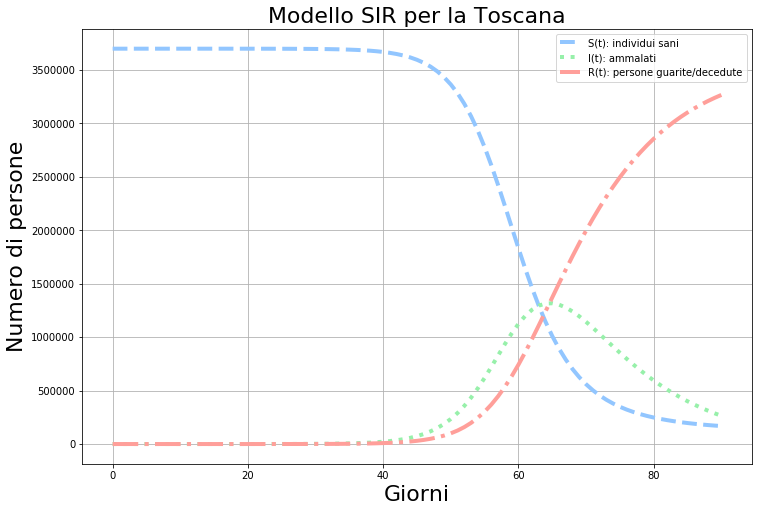

In [30]:
plt.figure(figsize=(12,8))
plt.plot(S, lw = 4, linestyle ='--', label='S(t): individui sani')
plt.plot(I, lw = 4, linestyle =':', label='I(t): ammalati')
plt.plot(R, lw = 4, linestyle = '-.', label='R(t): persone guarite/decedute')
plt.title('Modello SIR per la Toscana', size = 22)
plt.xlabel('Giorni', size = 22)
plt.ylabel('Numero di persone', size = 22)
plt.legend()
plt.grid()

In [31]:
np.linspace(0, 90, 91)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.])

# Esperiments

In [32]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [33]:
titanic[titanic['sex']=='male']['survived'].mean()

0.18890814558058924

In [34]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [35]:
titanic.pivot_table('survived', index = 'sex', aggfunc='sum')

,survived
sex,
female,233
male,109


In [36]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack() # calcolo la media dei sopravissuti per ogni classe divisa tra maschi e femminie

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [37]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [38]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class') #calcola la media dei sopravissuti per ogni classe divisi per maschi e femmini di età 0, 18 e 18,80

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [39]:
joinDF['terapia_intensiva']-joinDF['dimessi_guariti']-joinDF['deceduti']

0            0
1            0
2            0
3            0
4            0
         ...  
10491   -14924
10492   -14924
10493   -14924
10494   -14924
10495   -14924
Length: 10496, dtype: int64

In [40]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [41]:
titanic[titanic['sex']=='male']['survived'].mean()

0.18890814558058924

In [42]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [43]:
titanic.pivot_table('survived', index = 'sex', aggfunc='sum')

,survived
sex,
female,233
male,109


In [44]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack() # calcolo la media dei sopravissuti per ogni classe divisa tra maschi e femminie

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class') #calcola la media dei sopravissuti per ogni classe divisi per maschi e femmini di età 0, 18 e 18,80

In [ ]:
titanic.pivot_table('survived', index='sex', columns='class')

In [ ]:
joinDF['terapia_intensiva']-joinDF['dimessi_guariti']-joinDF['deceduti']

In [45]:
joinDF['terapia_intensiva']-joinDF['dimessi_guariti']-joinDF['deceduti']

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [46]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [47]:
joinDF['terapia_intensiva']-joinDF['dimessi_guariti']-joinDF['deceduti']

0            0
1            0
2            0
3            0
4            0
         ...  
10491   -14924
10492   -14924
10493   -14924
10494   -14924
10495   -14924
Length: 10496, dtype: int64